In [2]:
# test reading in 10x data with AnnData
import pandas as pd
import numpy as np
import scanpy as sc
from glob import glob
import os
import pickle
from scipy import sparse
import anndata as ad
import matplotlib

from matplotlib import pyplot as plt
import seaborn as sns
sns.set_palette(sns.color_palette("Spectral"))
sns.set_style("whitegrid")

from matplotlib.ticker import StrMethodFormatter
# ax.xaxis.set_major_formatter(StrMethodFormatter("{x:.2f}"))

import requests
from tqdm import tqdm


In [ ]:
labeled = sc.read_h5ad("label_transfer_combined_v5.h5ad")

In [3]:
with open('marker_genes_final.pkl', 'rb') as file:
    marker_genes = pickle.load(file)

In [7]:
labeled.obs['major cell label'] = labeled.obs['major cell label'].astype(str)

<img src = "leiden_rank_genes_0-2 (from mlist).png"></img>

In [10]:
labeled.obs.loc[labeled.obs["leiden_0-2"] == '1', 'major cell label'] = "Keratinocyte"
labeled.obs.loc[labeled.obs["leiden_0-2"] == '4', 'major cell label'] = "Keratinocyte"
labeled.obs.loc[labeled.obs["leiden_0-2"] == '7', 'major cell label'] = "Plasma"
labeled.obs.loc[labeled.obs["leiden_0-2"] == '8', 'major cell label'] = "LE"
labeled.obs.loc[labeled.obs["leiden_0-2"] == '13', 'major cell label'] = "T cell"

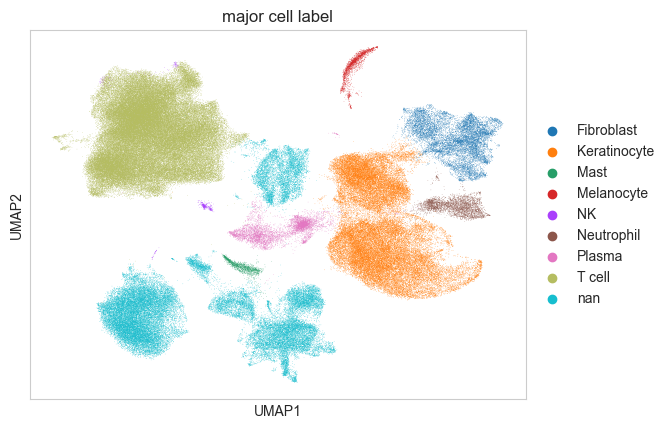

In [11]:
sc.pl.umap(labeled, color = "major cell label")

<img src="leiden0-2 (major).png" alt="Leiden Clustering" style="width: 50%;"/>

In [42]:
# sub cluster 2, 3, 11, 6

# sub cluster 2
label_2 = labeled[labeled.obs["leiden_0-2"] == '2'].copy()


In [43]:
# redo leiden clustering
sc.tl.leiden(label_2, resolution=0.2, key_added = "sub_cluster_2_0-2")
sc.tl.leiden(label_2, resolution=0.4, key_added = "sub_cluster_2_0-4")


C:\Users\randymi\AppData\Local\Temp\ipykernel_15940\4204521446.py:2: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(label_2, resolution=0.2, key_added = "sub_cluster_2_0-2")


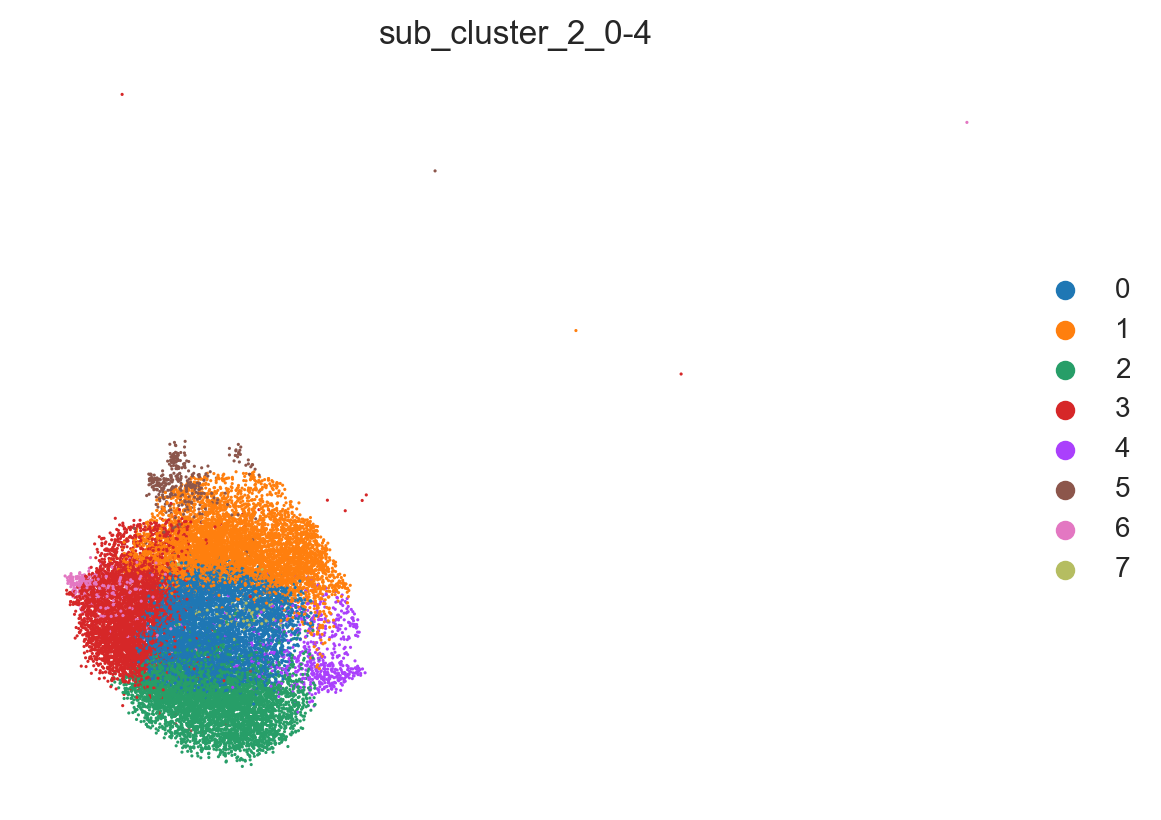

In [44]:
sc.pl.umap(label_2, color = "sub_cluster_2_0-4")
# 0-4 are dc/lc
# 5 = NK
# 6 = plasma
# 7 = Macrophage

In [45]:
label_2.obs["major cell label"] = label_2.obs["major cell label"].astype(str)

In [ ]:
with plt.rc_context():
    matplotlib.rcParams['patch.edgecolor'] = 'black'
    fig, ax = plt.subplots(figsize = (60,15))
    sc.pl.dotplot(label_2, marker_genes, groupby="sub_cluster_2_0-4", standard_scale="var", show = False, ax = ax)
    plt.tight_layout()
    fig.savefig("leiden_rank_genes_sub_clust_2_0-4.png", bbox_inches = "tight", dpi = 300)
    plt.close()

with plt.rc_context():
    matplotlib.rcParams['patch.edgecolor'] = 'black'
    fig, ax = plt.subplots(figsize = (60,15))
    sc.pl.rank_genes_groups_dotplot(labeled, groupby="leiden_0-2", key = "leiden_0-2_rank_genes", show = False, ax = ax)
    plt.tight_layout()
    fig.savefig("leiden_rank_genes_0-2-clust.png", bbox_inches = "tight", dpi = 300)
    plt.close()

<img src = "leiden0-2 subclusters/leiden_rank_genes_sub_clust_2_0-4.png"></img>

In [46]:
label_2.obs.loc[label_2.obs["sub_cluster_2_0-4"] == '0', 'major cell label'] = "B Cell"
label_2.obs.loc[label_2.obs["sub_cluster_2_0-4"] == '1', 'major cell label'] = "B Cell"
label_2.obs.loc[label_2.obs["sub_cluster_2_0-4"] == '2', 'major cell label'] = "B Cell"
label_2.obs.loc[label_2.obs["sub_cluster_2_0-4"] == '3', 'major cell label'] = "B Cell"
label_2.obs.loc[label_2.obs["sub_cluster_2_0-4"] == '4', 'major cell label'] = "B Cell"
label_2.obs.loc[label_2.obs["sub_cluster_2_0-4"] == '5', 'major cell label'] = "NK"
label_2.obs.loc[label_2.obs["sub_cluster_2_0-4"] == '6', 'major cell label'] = "plasma"
label_2.obs.loc[label_2.obs["sub_cluster_2_0-4"] == '7', 'major cell label'] = "macrophage"

labeled.obs["major cell label"] = label_2.obs["major cell label"].combine_first(labeled.obs["major cell label"])

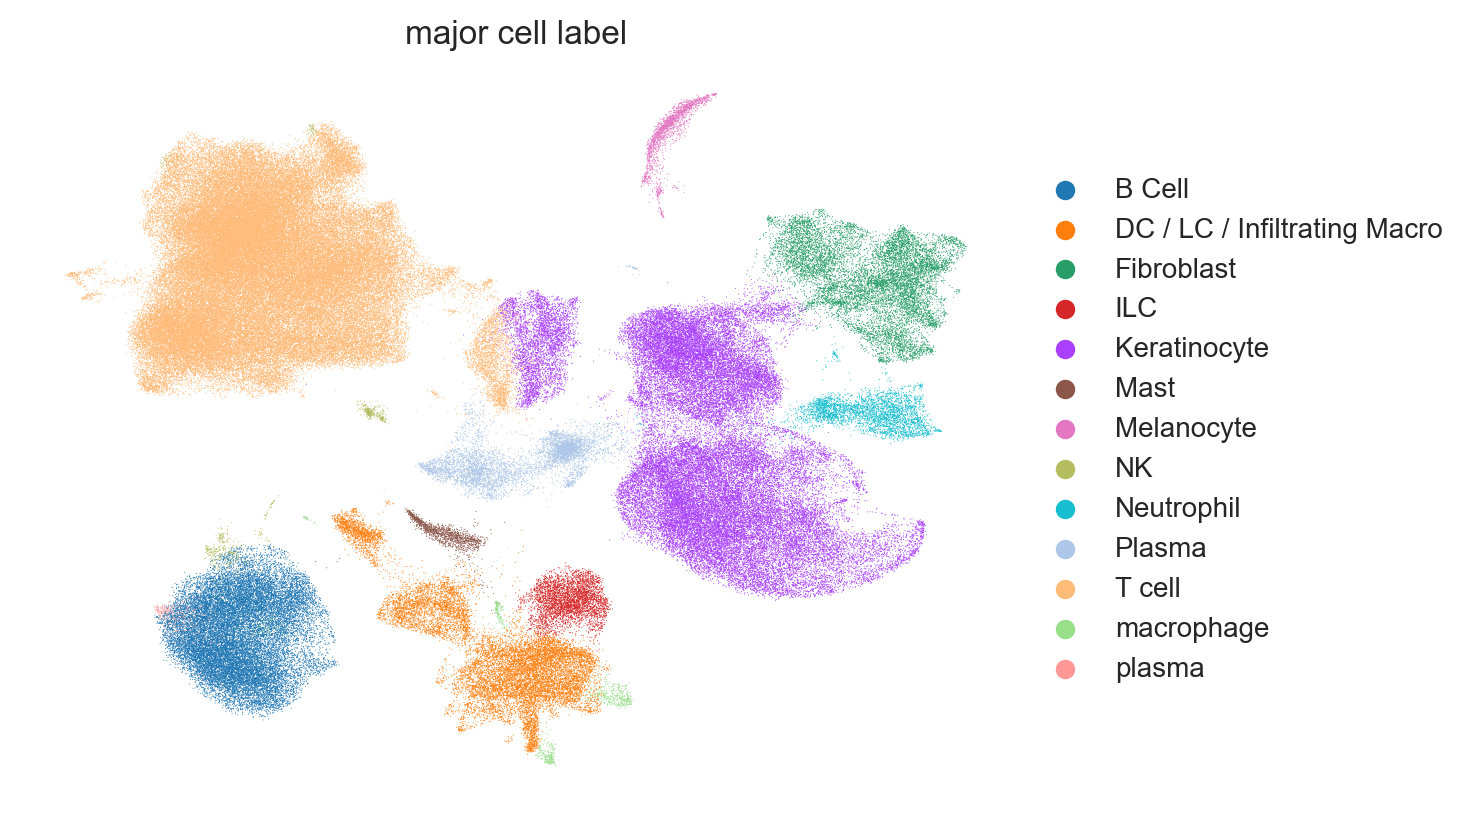

In [47]:
sc.pl.umap(labeled, color = "major cell label")

In [53]:
# sub cluster 3
label_3 = labeled[labeled.obs["leiden_0-2"] == '3'].copy()

In [63]:
# redo leiden clustering
sc.tl.leiden(label_3, resolution=0.1, key_added = "sub_cluster_3_0-1")
sc.tl.leiden(label_3, resolution=0.2, key_added = "sub_cluster_3_0-2")
sc.tl.leiden(label_3, resolution=0.4, key_added = "sub_cluster_3_0-4")

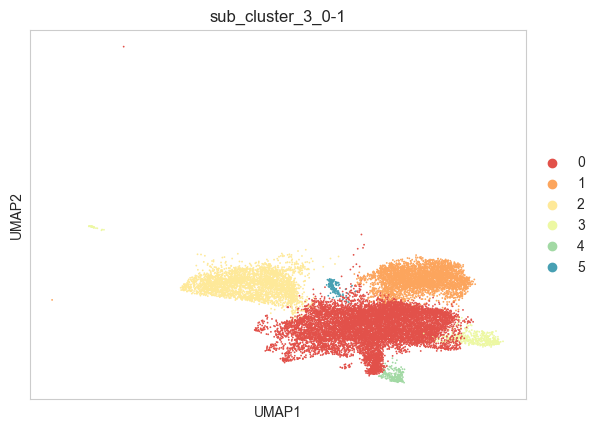

In [69]:
sc.pl.umap(label_3, color = "sub_cluster_3_0-1")

In [68]:
with plt.rc_context():
    matplotlib.rcParams['patch.edgecolor'] = 'black'
    fig, ax = plt.subplots(figsize = (60,15))
    sc.pl.dotplot(label_3, marker_genes, groupby="sub_cluster_3_0-1", standard_scale="var", show = False, ax = ax)
    plt.tight_layout()
    fig.savefig("leiden_rank_genes_sub_clust_3_0-1.png", bbox_inches = "tight", dpi = 300)
    plt.close()

<img src = "leiden0-2 subclusters/leiden_rank_genes_sub_clust_3_0-1.png"></img>

In [79]:
label_3.obs["major cell label"] = label_3.obs["major cell label"].astype(str)

In [80]:
label_3.obs.loc[label_3.obs["sub_cluster_3_0-1"] == '0', 'major cell label'] = "DC / LC / Infiltrating Macro"
label_3.obs.loc[label_3.obs["sub_cluster_3_0-1"] == '1', 'major cell label'] = "ILC"
label_3.obs.loc[label_3.obs["sub_cluster_3_0-1"] == '2', 'major cell label'] = "DC / LC / Infiltrating Macro"
label_3.obs.loc[label_3.obs["sub_cluster_3_0-1"] == '3', 'major cell label'] = "macrophage"
label_3.obs.loc[label_3.obs["sub_cluster_3_0-1"] == '4', 'major cell label'] = "macrophage"
label_3.obs.loc[label_3.obs["sub_cluster_3_0-1"] == '5', 'major cell label'] = "macrophage"


labeled.obs["major cell label"] = label_3.obs["major cell label"].combine_first(labeled.obs["major cell label"])

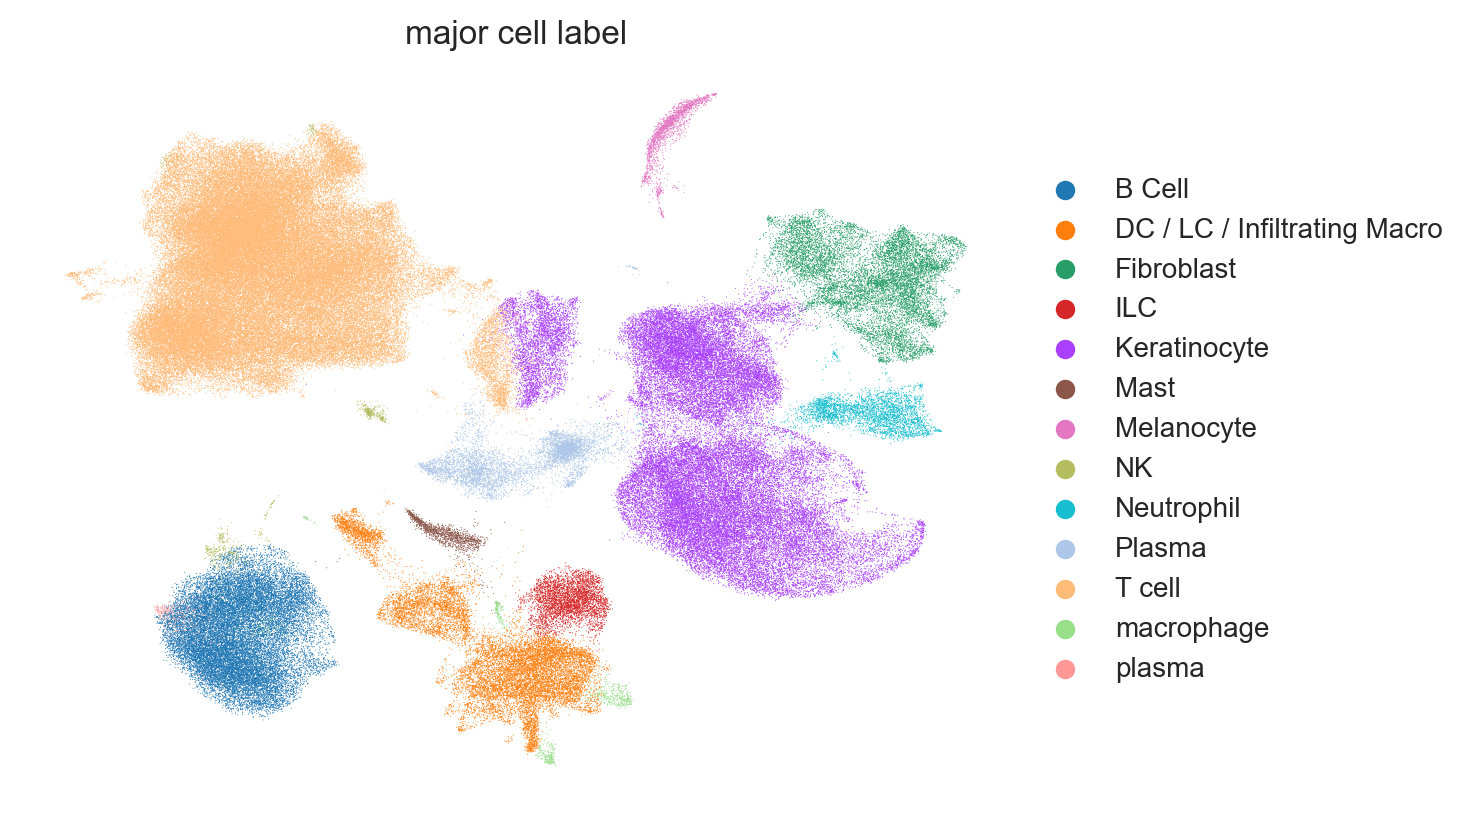

In [48]:
sc.pl.umap(labeled, color = "major cell label")

In [82]:
# cluter 11 relabel
labeled.obs.loc[labeled.obs["leiden_0-2"] == '11', 'major cell label'] = "DC / LC / Infiltrating Macro"

In [85]:
# cluster 6 subcluster
label_6 = labeled[labeled.obs["leiden_0-2"] == '6'].copy()

In [86]:
# redo leiden clustering
sc.tl.leiden(label_6, resolution=0.1, key_added = "sub_cluster_6_0-1")
sc.tl.leiden(label_6, resolution=0.2, key_added = "sub_cluster_6_0-2")
sc.tl.leiden(label_6, resolution=0.4, key_added = "sub_cluster_6_0-4")

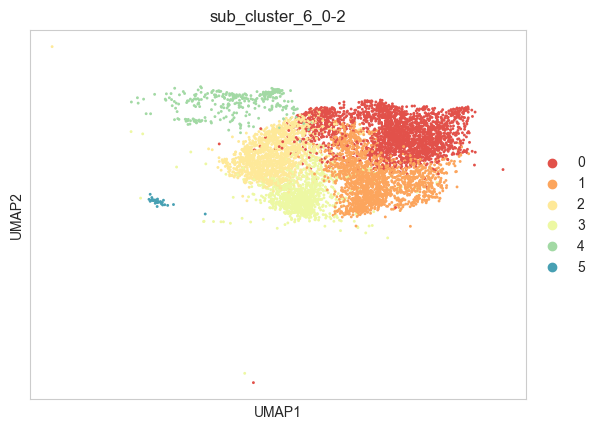

In [89]:
sc.pl.umap(label_6, color = "sub_cluster_6_0-2")

In [91]:
with plt.rc_context():
    matplotlib.rcParams['patch.edgecolor'] = 'black'
    fig, ax = plt.subplots(figsize = (60,15))
    sc.pl.dotplot(label_6, marker_genes, groupby="sub_cluster_6_0-2", standard_scale="var", show = False, ax = ax)
    plt.tight_layout()
    fig.savefig("leiden_rank_genes_sub_clust_6_0-2.png", bbox_inches = "tight", dpi = 300)
    plt.close()

<img src = "leiden_rank_genes_sub_clust_6_0-2.png"></img>

In [93]:
# very clear 0-1 are KC
# 2-5 are t cell
label_6.obs["major cell label"] = label_6.obs["major cell label"].astype(str)
label_6.obs.loc[label_6.obs["sub_cluster_6_0-2"] == '0', 'major cell label'] = "Keratinocyte"
label_6.obs.loc[label_6.obs["sub_cluster_6_0-2"] == '1', 'major cell label'] = "Keratinocyte"
label_6.obs.loc[label_6.obs["sub_cluster_6_0-2"] == '2', 'major cell label'] = "T cell"
label_6.obs.loc[label_6.obs["sub_cluster_6_0-2"] == '3', 'major cell label'] = "T cell"
label_6.obs.loc[label_6.obs["sub_cluster_6_0-2"] == '4', 'major cell label'] = "T cell"
label_6.obs.loc[label_6.obs["sub_cluster_6_0-2"] == '5', 'major cell label'] = "T cell"


labeled.obs["major cell label"] = label_6.obs["major cell label"].combine_first(labeled.obs["major cell label"])

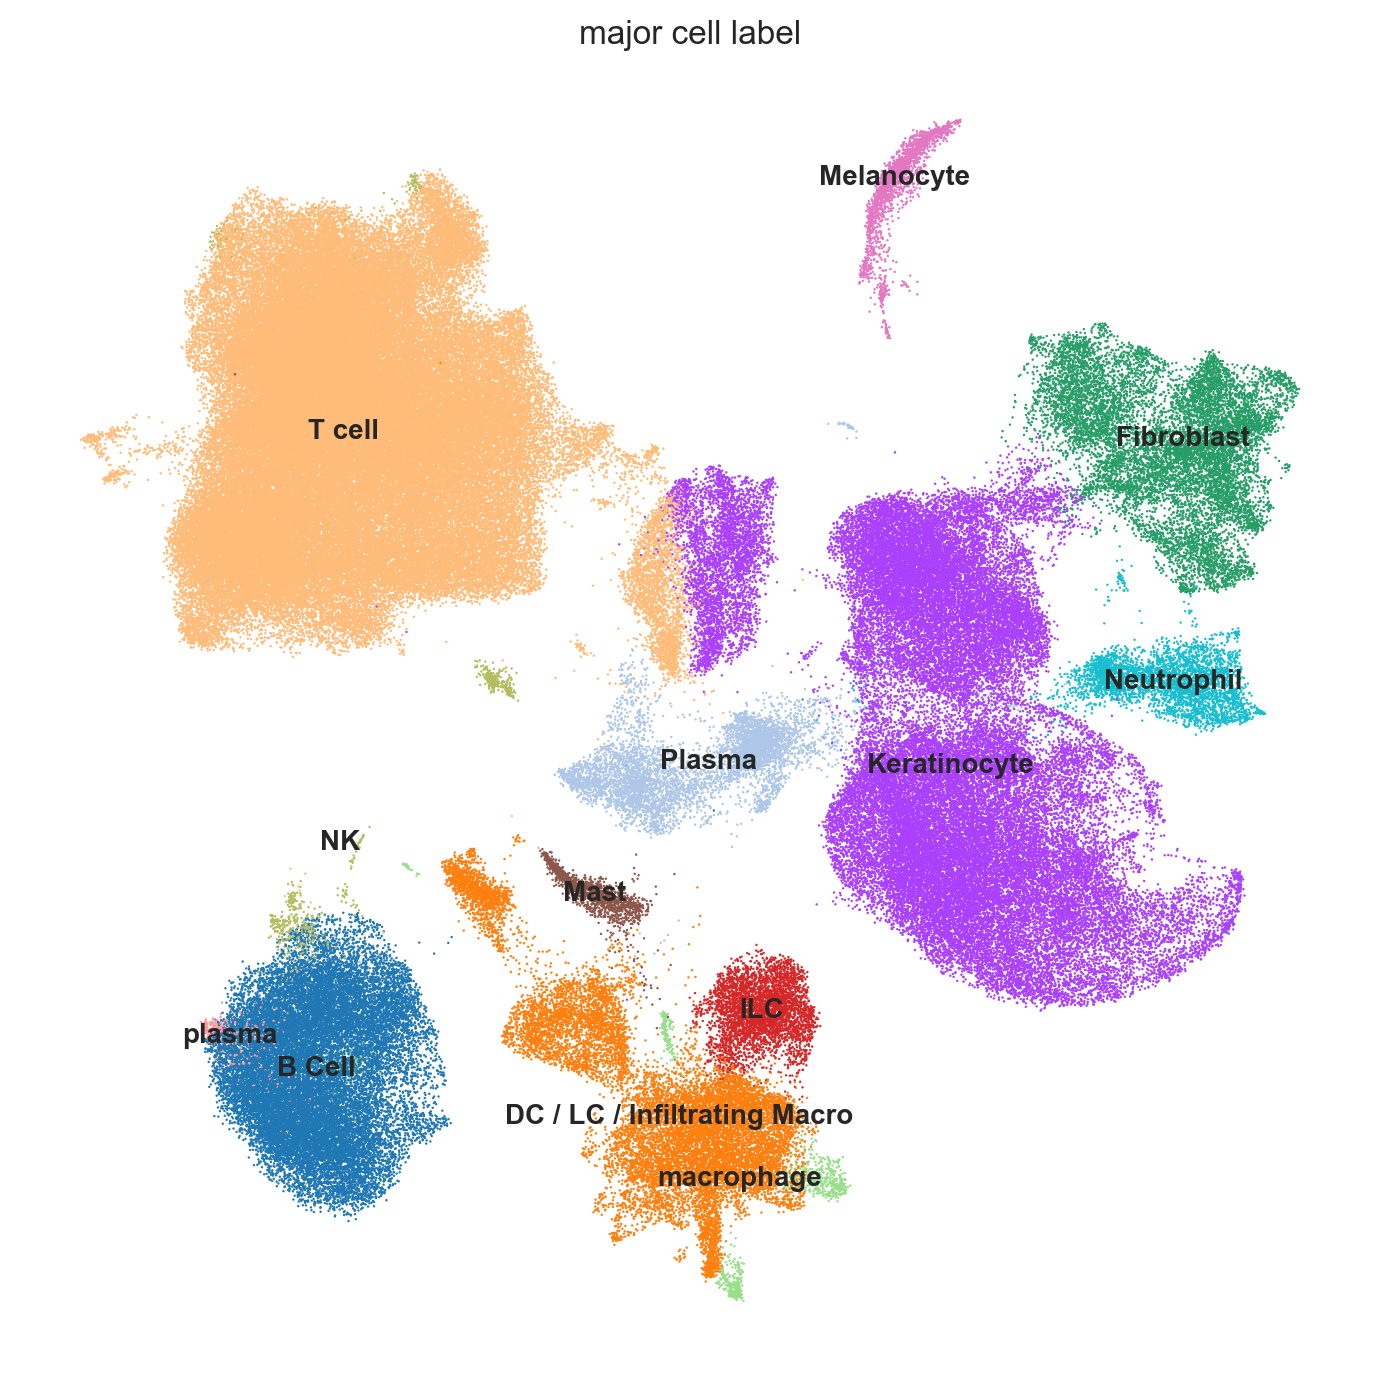

In [53]:
with plt.rc_context():
    fig, ax = plt.subplots(figsize = (7,7))
    sc.pl.umap(labeled, color = "major cell label", legend_loc = "on data", show = False, ax = ax, size = 3)
    plt.tight_layout()
    plt.show()
    #fig.savefig("major_cell_labels.png", bbox_inches = "tight", dpi = 300)

In [98]:
labeled.write_h5ad("label_transfer_combined_v6_finished_major.h5ad")

In [4]:
labeled = sc.read_h5ad("label_transfer_combined_v6_finished_major.h5ad")

In [6]:
# save markers as json
import json 
with open("marker_genes.json", "r") as outfile: 
    json.dump(marker_genes, outfile)

Current Issues
* try finding minor cell types using defined subclusters or markers that conflict within group to find borders
    * DC/LC/Infiltrating Macrophage have same clustering
    * KCs are merged together

* No B cell cluster

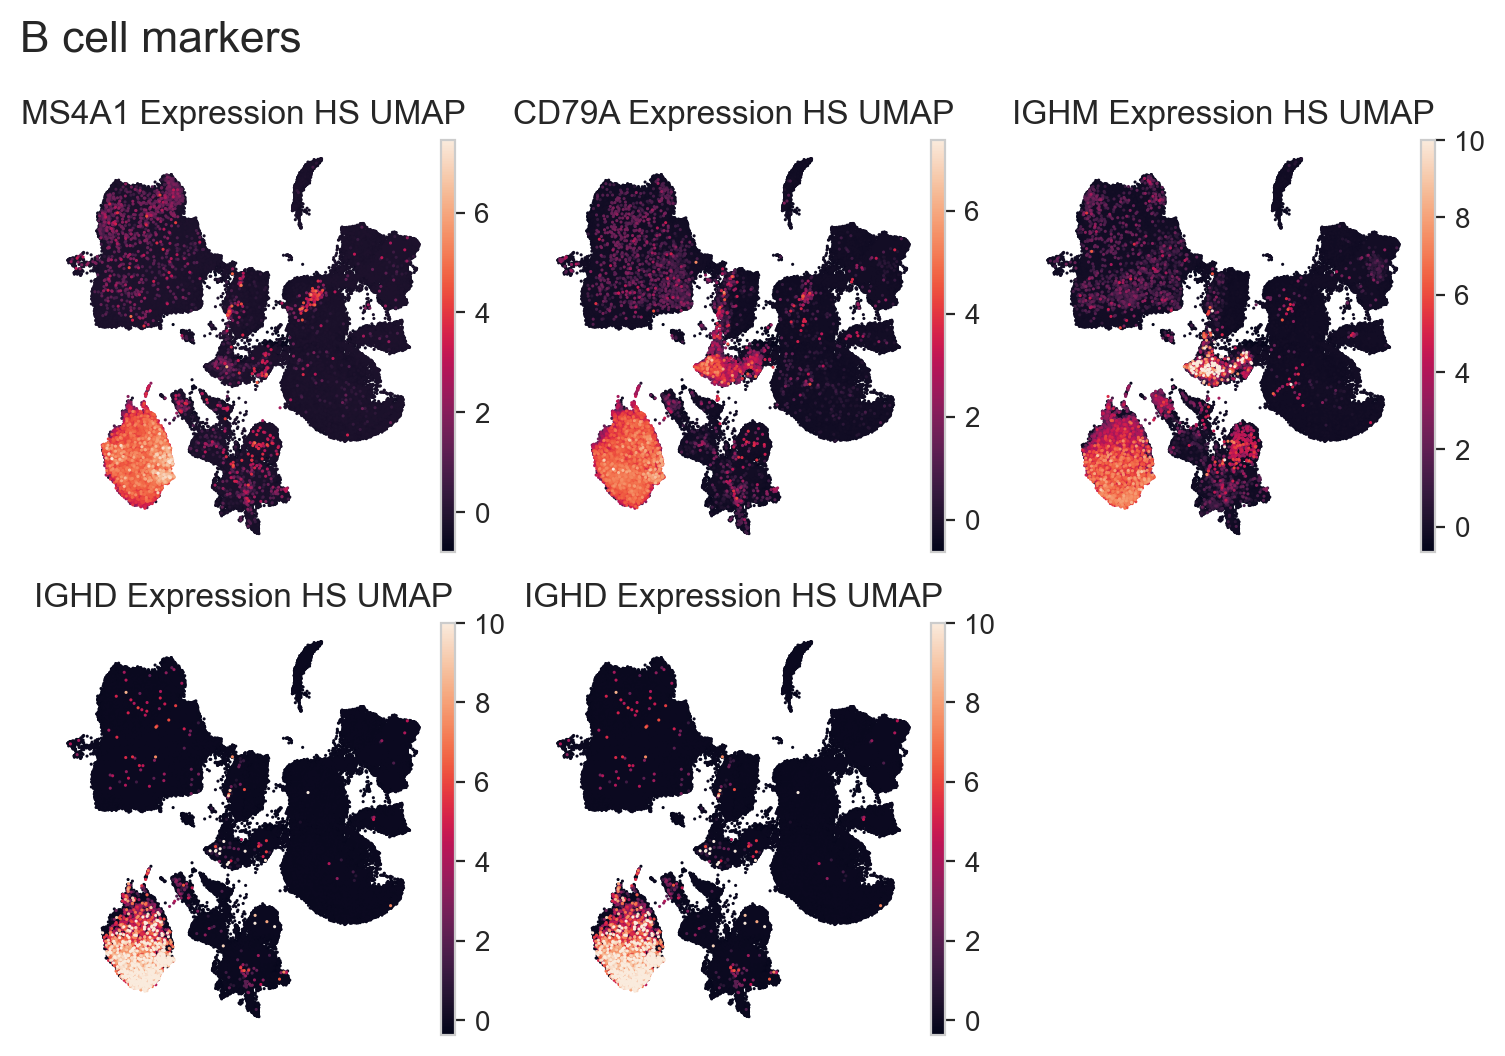

In [34]:
# B cell Marker Visualization
def plot_gene_umap_sc(adata, genes: list[str], title = None, show_centroids = False):
    # assume you've stored it there
    genes = [gene.upper() for gene in genes]
    
    centroids = {}
    if show_centroids:
        centroids = adata.uns['centroids']
    
    with plt.rc_context():
        n_col = 3 if len(genes) >= 3 else len(genes)
        n_row = int(np.ceil(len(genes)/3))
        fig, axes = plt.subplots(n_row, n_col, figsize = (n_col * 2.5, n_row * 2.5))
        axes = axes.flatten()

        for i, gene in enumerate(genes):
            sc.pl.umap(adata, color = gene, show = False, size = 5, title = f"{gene} Expression HS UMAP", ax = axes[i])
        
        for idx in range(len(genes), n_row*n_col):
            axes[idx].set_visible(False)

        for cluster, (x_umap, y_umap) in centroids.items():
            plt.text(x_umap, y_umap, cluster, fontsize=12, ha='center')
        plt.tight_layout()
        if title:
            fig.suptitle(title, fontsize=16, y=1.05, x = 0.0, ha='left')  # y adjusts the position of the suptitle
        plt.show()

# mark cluster 2 b-cell
plot_gene_umap_sc(labeled, ["MS4A1","CD79A","IGHM","IGHD", "IGHD"], title = "B cell markers")

In [41]:
labeled

AnnData object with n_obs × n_vars = 223816 × 2232
    obs: 'cell_id', 'GSM', 'batch', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'n_genes', 'doublet_score', 'predicted_doublet', 'leiden', 'final_clustering', 'leiden_0-2', 'leiden_0-4', 'leiden_0-6', 'leiden_0-8', 'leiden_1-0', 'leiden_1-2', 'leiden_1-4', 'leiden_1-6', 'leiden_1-8', 'leiden_2-0', 'major cell label'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection', 'mean', 'std', 'symbol', 'gene-id'
    uns: 'GSM_colors', 'batch_colors', 'hvg', 'leiden', 'leiden_0-2', 'leiden_0-2_colors', 'leiden_0-4', 'leid

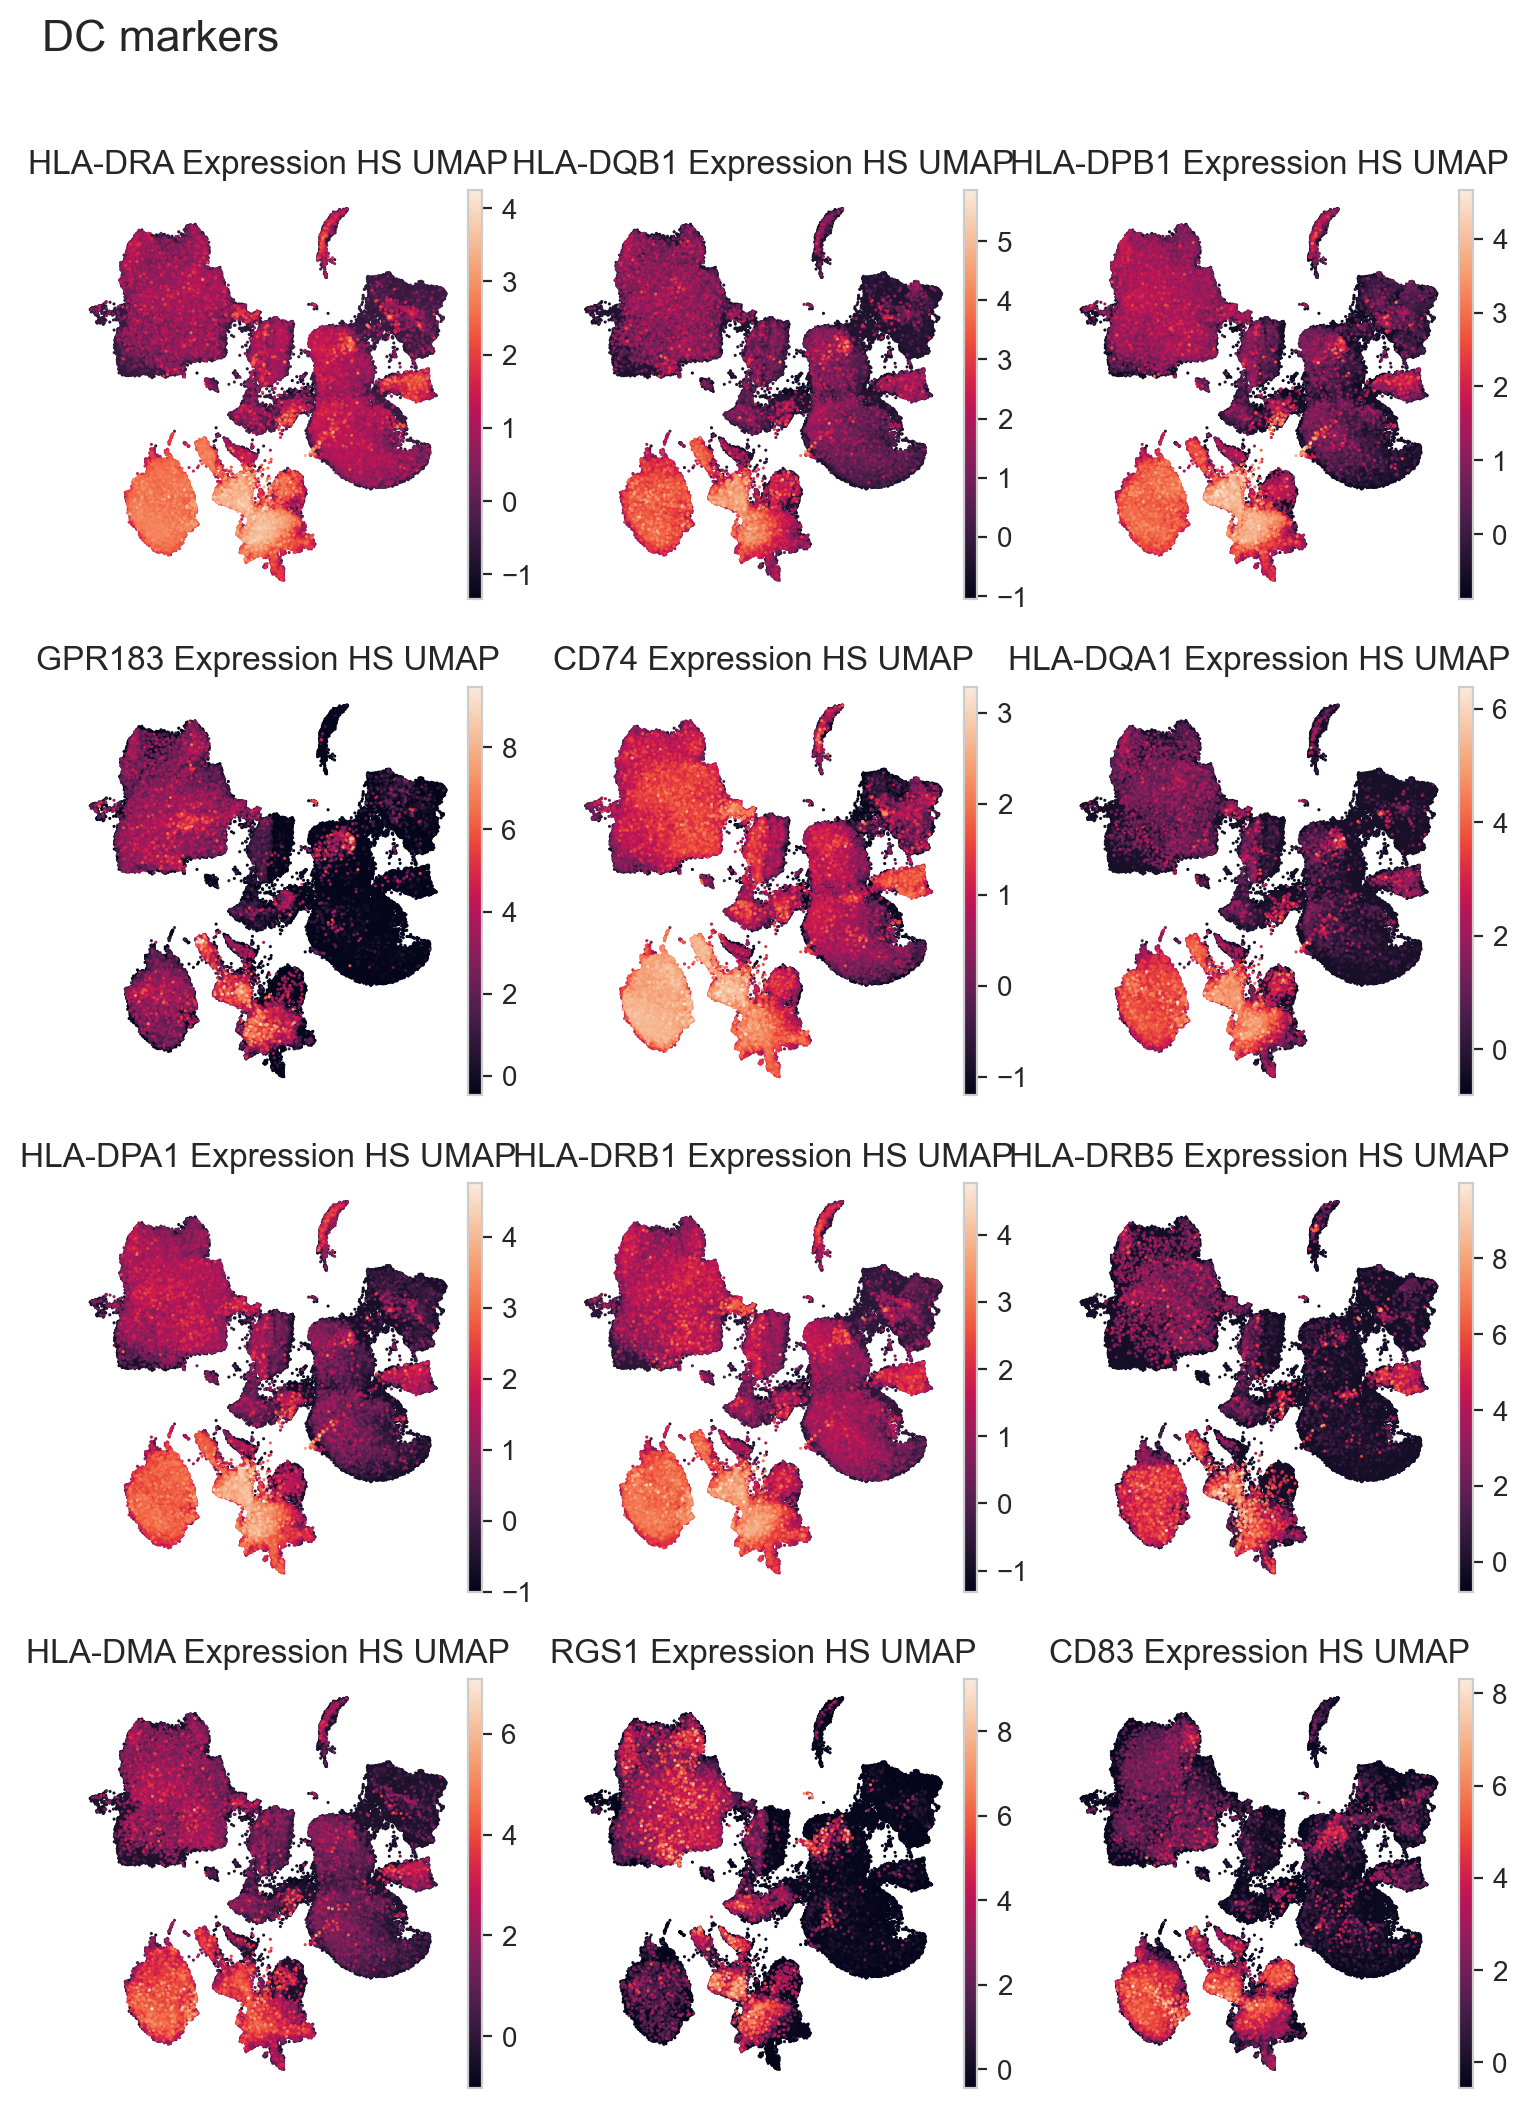

In [35]:
# DC Marker
plot_gene_umap_sc(labeled, [
        "HLA-DRA",
        "HLA-DQB1",
        "HLA-DPB1",
        "GPR183",
        "CD74",
        "HLA-DQA1",
        "HLA-DPA1",
        "HLA-DRB1",
        "HLA-DRB5",
        "HLA-DMA",
        "RGS1",
        "CD83"
    ], title = "DC markers")

In [40]:
pd.DataFrame(index = labeled.obs['batch'].value_counts().index, data = {"cell_counts" : labeled.obs['batch'].value_counts(), "pct of total" : labeled.obs['batch'].value_counts()/labeled.n_obs})

cell_counts  pct of total
batch                            
249793        59230      0.264637
249622        57264      0.255853
155850        35847      0.160163
154775        23216      0.103728
249621        15574      0.069584
175990        14741      0.065862
220116        12235      0.054665
0              5709      0.025508

In [58]:
labeled.obs

cell_id      GSM   batch  n_genes_by_counts  \
cell_0       AAACCTGAGATACACA-1  7964417  249793                614   
cell_1       AAACCTGAGCAGCCTC-1  7964417  249793               1517   
cell_2       AAACCTGCAAGAGTCG-1  7964417  249793               1080   
cell_3       AAACCTGCATGTAAGA-1  7964417  249793               3521   
cell_4       AAACCTGCATTGGCGC-1  7964417  249793                951   
...                         ...      ...     ...                ...   
cell_223811  TTTGTCATCACCGTAA-1        0       0               1787   
cell_223812  TTTGTCATCATCATTC-1        0       0               1978   
cell_223813  TTTGTCATCCACTCCA-1        0       0               2630   
cell_223814  TTTGTCATCGAATGGG-1        0       0               2203   
cell_223815  TTTGTCATCTCGCTTG-1        0       0                914   

             log1p_n_genes_by_counts  total_counts  log1p_total_counts  \
cell_0                      6.421622        1285.0            7.159292   
cell_1                      7.325149        5174.0            8.551595   
cell_2                      6.985642        2540.0            7.840313   
cell_3                      8.166784       15978.0            9.679030   
cell_4                      6.858565        2399.0            7.783224   
...                              ...           ...                 ...   
cell_223811                 7.488853        7293.0            8.894808   
cell_223812                 7.590347        6746.0            8.816854   
cell_223813                 7.875119       13098.0            9.480291   
cell_223814                 7.698029        9104.0            9.116579   
cell_223815                 6.818924        2810.0            7.941296   

             pct_counts_in_top_50_genes  pct_counts_in_top_100_genes  \
cell_0                        42.568093                    53.618677   
cell_1                        36.258214                    50.367221   
cell_2                        35.511811                    48.070866   
cell_3                        28.858430                    41.012642   
cell_4                        40.183410                    53.563985   
...                                 ...                          ...   
cell_223811                   42.259701                    57.808858   
cell_223812                   37.474059                    52.905425   
cell_223813                   40.838296                    56.848374   
cell_223814                   37.159490                    54.173989   
cell_223815                   44.519573                    59.501779   

             pct_counts_in_top_200_genes  ...  leiden_0-4  leiden_0-6  \
cell_0                         67.782101  ...           6           7   
cell_1                         63.761113  ...           6           7   
cell_2                         60.078740  ...           0           0   
cell_3                         53.248216  ...           8           9   
cell_4                         64.735306  ...           0           0   
...                                  ...  ...         ...         ...   
cell_223811                    69.518717  ...          14          17   
cell_223812                    63.652535  ...           1           2   
cell_223813                    68.651703  ...           1           2   
cell_223814                    66.058875  ...           5           5   
cell_223815                    71.174377  ...           3           4   

             leiden_0-8  leiden_1-0  leiden_1-2  leiden_1-4  leiden_1-6  \
cell_0                7           6           6           8           9   
cell_1                7           6           6           8           9   
cell_2                0           0           0           0           0   
cell_3                9          11          11          12          12   
cell_4                0           0           0           0          19   
...                 ...         ...         ...         ...         ...   
cell_223811    

In [ ]:
sc.tl.rank_genes_groups(labeled,"leiden_0-8", method = "wilcoxon")

In [61]:
with plt.rc_context():
    matplotlib.rcParams['patch.edgecolor'] = 'black'
    fig, ax = plt.subplots(figsize = (70,10))
    sc.pl.rank_genes_groups_dotplot(labeled, show = False, ax = ax)
    plt.tight_layout()
    fig.savefig("rank_genes_leiden_0-8.png", bbox_inches = "tight", dpi = 300)

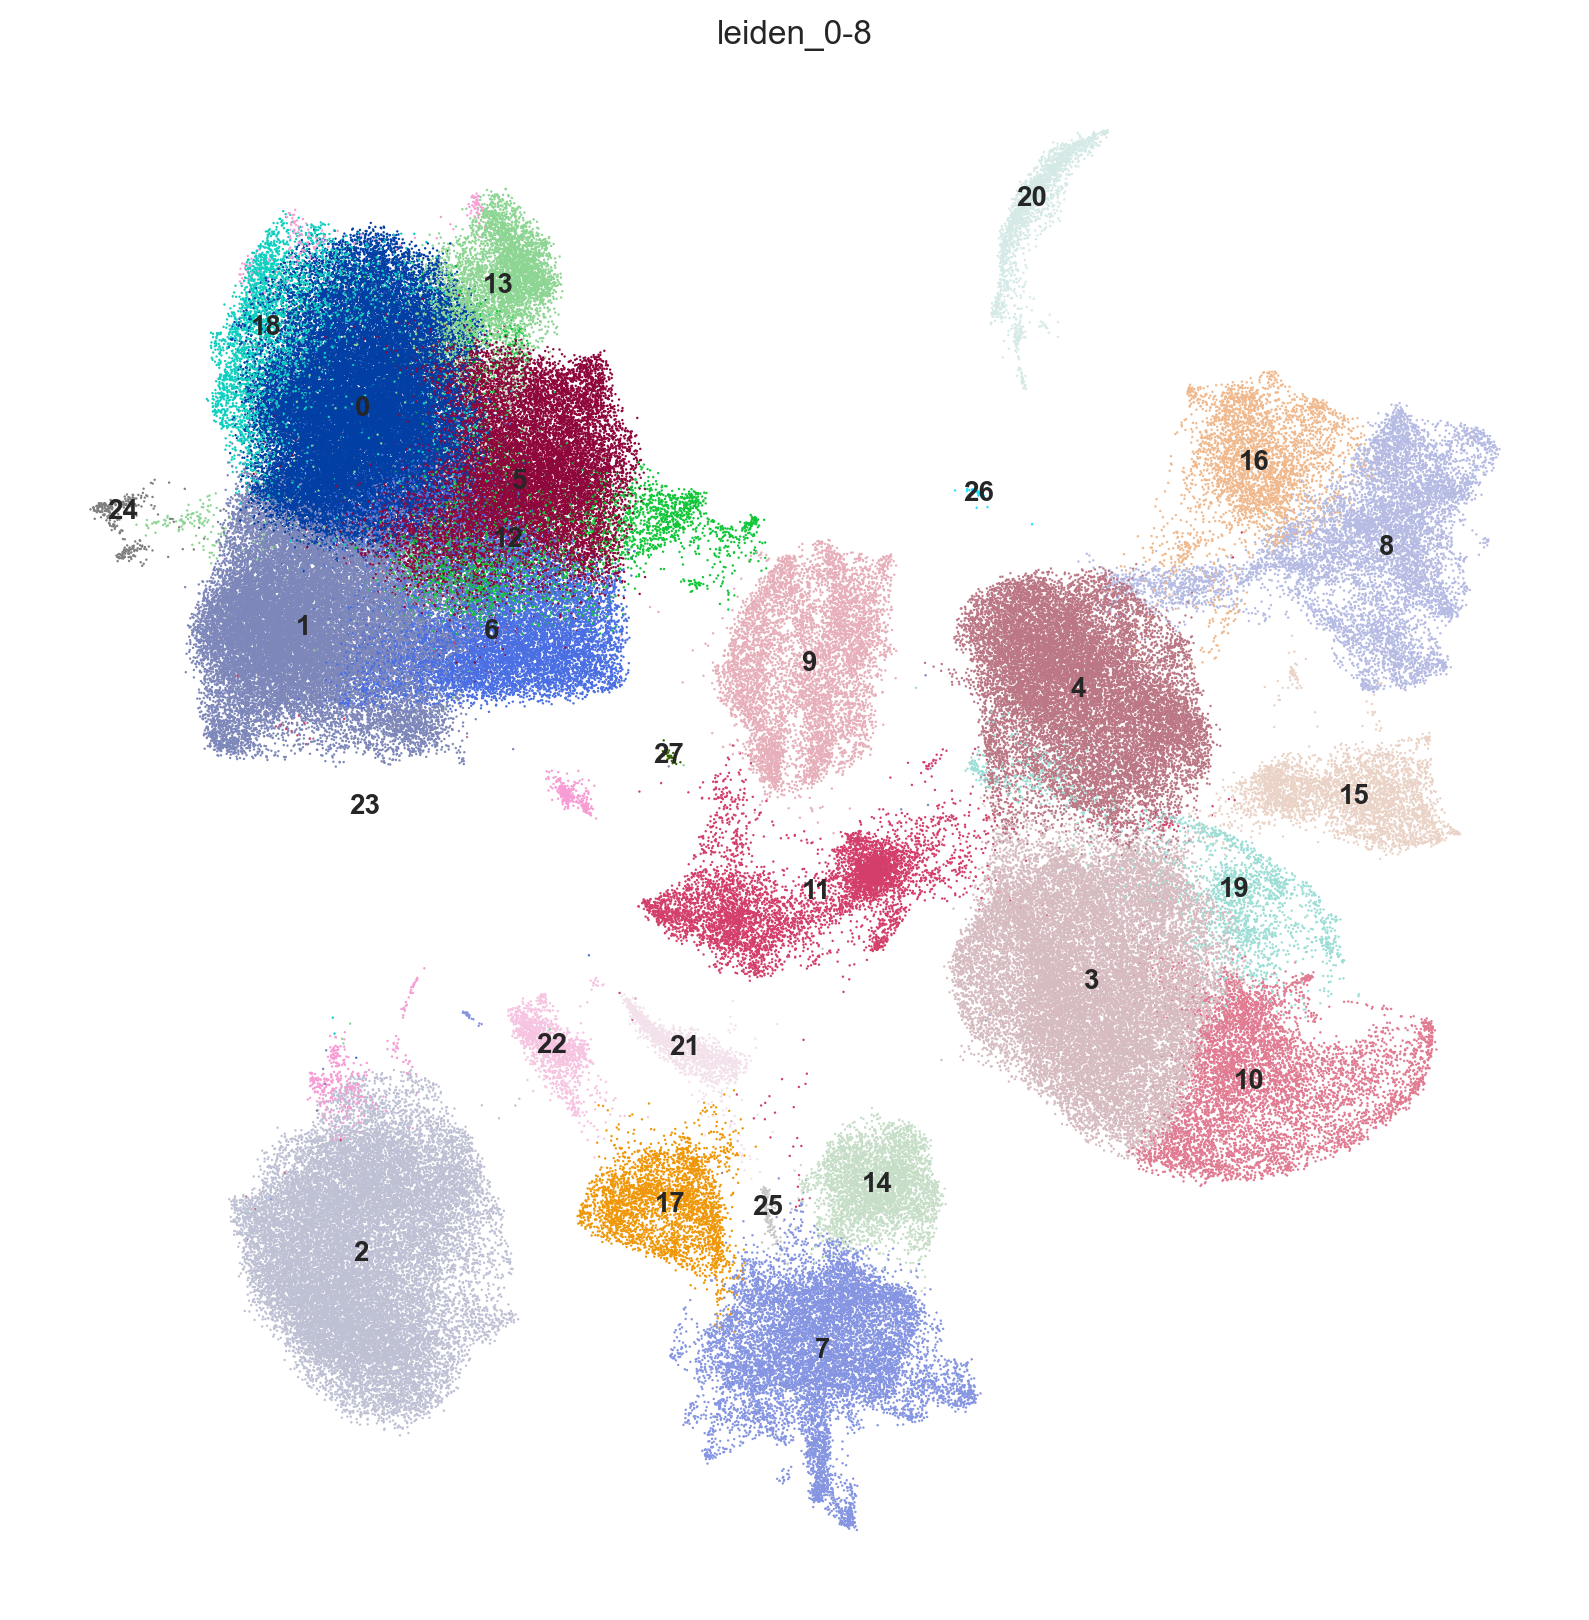

In [66]:
with plt.rc_context():
    matplotlib.rcParams['patch.edgecolor'] = 'black'
    fig, ax = plt.subplots(figsize = (10,10))
    sc.pl.umap(labeled, color = "leiden_0-8", legend_loc = "on data",show = False, ax = ax, size = 3)
    plt.show()

In [2]:
labeled = sc.read_h5ad("label_transfer_combined_v10.h5ad")

In [13]:
labeled[labeled.obs["leiden_0-2"] == '6']

View of AnnData object with n_obs × n_vars = 7076 × 2232
    obs: 'cell_id', 'GSM', 'batch', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'n_genes', 'doublet_score', 'predicted_doublet', 'leiden', 'final_clustering', 'leiden_0-2', 'leiden_0-4', 'leiden_0-6', 'leiden_0-8', 'leiden_1-0', 'leiden_1-2', 'leiden_1-4', 'leiden_1-6', 'leiden_1-8', 'leiden_2-0', 'major cell label', 'minor cell label'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection', 'mean', 'std', 'symbol', 'gene-id'
    uns: 'GSM_colors', 'batch_colors', 'dendrogram_leiden_0-2', 'dendrogram_leiden_0

In [9]:
combined = sc.read_h5ad("../label transfer/New Data 2/combined_counts.h5ad")
combined

AnnData object with n_obs × n_vars = 223816 × 28241
    obs: 'cell_id', 'GSM', 'batch', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'n_genes', 'doublet_score', 'predicted_doublet'

In [14]:
labeled_h5ad = labeled[labeled.obs["leiden_0-2"] == '6'].copy()
combined_h5ad = combined[labeled.obs["leiden_0-2"] == '6'].copy()
labeled_h5ad.write_h5ad("cluster_6_processed.h5ad")
combined_h5ad.write_h5ad("cluster_6_postqc.h5ad")


In [18]:
combined_h5ad

AnnData object with n_obs × n_vars = 7076 × 28241
    obs: 'cell_id', 'GSM', 'batch', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'n_genes', 'doublet_score', 'predicted_doublet'

In [25]:
labeled_h5ad.obs["batch"].value_counts()

batch
249622    2477
155850    2280
154775    1304
249621     341
0          231
175990     207
249793     171
220116      65
Name: count, dtype: int64

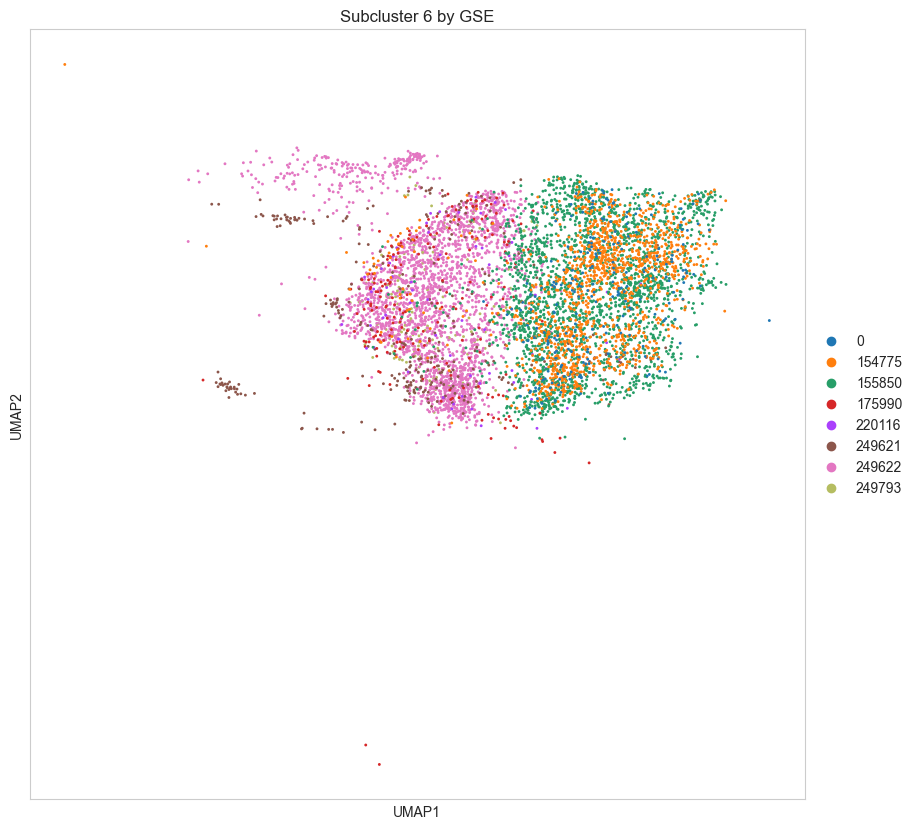

In [7]:
subclust6 = sc.read_h5ad("cluster_6_processed.h5ad")

with plt.rc_context():
    matplotlib.rcParams['patch.edgecolor'] = 'black'
    fig, ax = plt.subplots(figsize = (10,10))
    sc.pl.umap(subclust6, color = "batch", ax = ax, show = False)
    ax.set_title("Subcluster 6 by GSE")
    plt.show()
